# Build an MLP with different kernels

## Dataset - circles

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles, make_checkerboard
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.05)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}

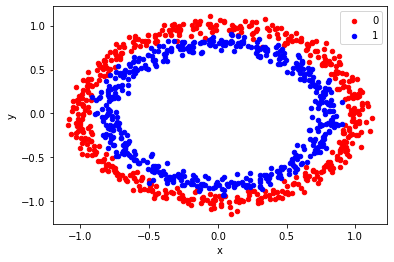

In [10]:
# Plotting the dataset
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show() 

We create a training and test set:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Linear kernel

Now, we create a neural network with two hidden layers, and a linear kernel. Notice that we also run the algorithm 10 times so our results converge (more on this later):

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
output_dim = 1

model = Sequential()

# Add the input layer and connect to 50 hidden neurons
model.add(Dense(50,input_dim=input_dim))
model.add(Activation('linear'))

# Extra hidden layer can be added like this
model.add(Dense(50))
model.add(Activation('linear'))

# Connect the previous layer to the output layer
model.add(Dense(output_dim))

# Add a final layer for classification based on the sigmoid function
model.add(Activation('sigmoid'))

# We use Adam optimiser
model.compile(optimizer=Adam(),loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=10)

prediction_class = [1 if i > 0.5 else 0 for i in model.predict(X_test)]

print('Accuracy:', accuracy_score(y_test,prediction_class))
print('AUC:', roc_auc_score(y_test,model.predict(X_test)))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                150       
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
____________________________________________________

Clearly, the network is having a hard time coming up with good results. The linear kernel will just not be able to capture the shapes in the data adequately.

Let's try a different kernel.

## ReLU kernel

In [23]:
model = Sequential()
model.add(Dense(50,input_dim=input_dim))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(output_dim))

model.add(Activation('sigmoid'))

model.compile(optimizer = Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train,epochs=10)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                150       
_________________________________________________________________
activation_6 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_7 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
____________________________________________________

In [24]:
prediction_class = [1 if i > 0.5 else 0 for i in model.predict(X_test)]

print('Accuracy:', accuracy_score(y_test,prediction_class))
print('AUC:', roc_auc_score(y_test,model.predict(X_test)))

Accuracy: 0.7066666666666667
AUC: 0.8652794451113779
